In [2]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.stats import linregress

import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tab = Table.read('/home/jotter/nrao/summer_research_2018/tables/r0.5_catalog_bgfit_mar21_ulim.fits')
onctab = Table.read('/home/jotter/nrao/summer_research_2018/tables/IR_matches_MLLA_mar21_full.fits')
omc1tab = Table.read('/home/jotter/nrao/summer_research_2018/tables/OMC1_r0.5_mar21.fits')
calc = Table.read('/home/jotter/nrao/summer_research_2018/tables/r0.5_mar21_calc_vals.fits')

onc_ind = []
omc1_ind= []
for seq in tab['Seq']:
    if seq in onctab['Seq']:
        onc_ind.append(seq)
    if seq in omc1tab['Seq']:
        omc1_ind.append(seq)
        

In [4]:
theta1c = SkyCoord(ra='05h35m16.46375s', dec='−05d23m22.8486s')

In [5]:
onc_coord = SkyCoord(ra=onctab['RA_B3'], dec=onctab['DEC_B3'], unit=u.degree)
omc1_coord = SkyCoord(ra=omc1tab['RA_B3'], dec=omc1tab['DEC_B3'], unit=u.degree)

In [6]:
onc_radian = onc_coord.separation(theta1c).to(u.radian).value
omc1_radian = omc1_coord.separation(theta1c).to(u.radian).value

onc_dist = onc_radian*(400*u.pc)
omc1_dist = omc1_radian*(400*u.pc)

onc_dustmass = calc[onc_ind]['dust_mass_B3']
omc1_dustmass = calc[omc1_ind]['dust_mass_B3']

onc_rdisk = tab[onc_ind]['fwhm_maj_deconv_B3']
onc_rdisk_ind = np.isnan(onc_rdisk)==False
omc1_rdisk = tab[omc1_ind]['fwhm_maj_deconv_B3']
omc1_rdisk_ind = np.isnan(omc1_rdisk)==False

In [7]:
onc_linreg = linregress(onc_dist, np.log10(onc_dustmass))
omc1_linreg = linregress(omc1_dist, np.log10(omc1_dustmass))

print(onc_linreg.pvalue)
print(omc1_linreg.pvalue)

0.4629891793374985
0.6786287913661742


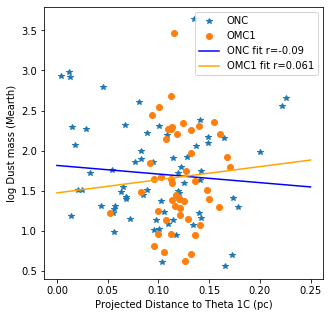

In [8]:
plt.figure(figsize=(5,5))
plt.plot(onc_dist, np.log10(onc_dustmass), label='ONC', linestyle='', marker='*')
plt.plot(omc1_dist, np.log10(omc1_dustmass), label='OMC1', linestyle='', marker='o')

dvals = np.linspace(0,0.25,10)
onc_fit = dvals* onc_linreg.slope + onc_linreg.intercept
omc1_fit = dvals* omc1_linreg.slope + omc1_linreg.intercept

plt.plot(dvals, onc_fit, label=f'ONC fit r={np.round(onc_linreg.rvalue, 3)}', color='blue')
plt.plot(dvals, omc1_fit, label=f'OMC1 fit r={np.round(omc1_linreg.rvalue, 3)}', color='orange')

plt.legend()

plt.xlabel('Projected Distance to Theta 1C (pc)')
plt.ylabel('log Dust mass (Mearth)')
plt.savefig('/home/jotter/nrao/plots/dist_theta1c_dmass.png', bbox_inches='tight')

In [9]:
onc_linreg = linregress(onc_dist[onc_rdisk_ind], onc_rdisk[onc_rdisk_ind])
omc1_linreg = linregress(omc1_dist[omc1_rdisk_ind], omc1_rdisk[omc1_rdisk_ind])

print(onc_linreg.rvalue)
print(omc1_linreg.rvalue)

#onc_linreg = linregress(np.log10(onc_dist[onc_rdisk_ind].value), onc_rdisk[onc_rdisk_ind])
#omc1_linreg = linregress(np.log10(omc1_dist[omc1_rdisk_ind].value), omc1_rdisk[omc1_rdisk_ind])

#print(onc_linreg.rvalue)
#print(omc1_linreg.rvalue)

#onc_linreg = linregress(onc_dist[onc_rdisk_ind], np.log10(onc_rdisk[onc_rdisk_ind]))
#omc1_linreg = linregress(omc1_dist[omc1_rdisk_ind], np.log10(omc1_rdisk[omc1_rdisk_ind]))

#print(onc_linreg.rvalue)
#print(omc1_linreg.rvalue)

-0.12548299872543386
0.07007011590533646


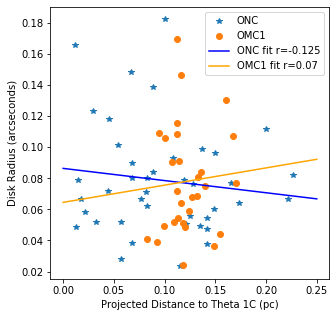

In [10]:
plt.figure(figsize=(5,5))
plt.plot(onc_dist, onc_rdisk, label='ONC', linestyle='', marker='*')
plt.plot(omc1_dist, omc1_rdisk, label='OMC1', linestyle='', marker='o')

rvals = np.linspace(0,0.25,10)
onc_fit = rvals* onc_linreg.slope + onc_linreg.intercept
omc1_fit = rvals* omc1_linreg.slope + omc1_linreg.intercept

plt.plot(dvals, onc_fit, label=f'ONC fit r={np.round(onc_linreg.rvalue, 3)}', color='blue')
plt.plot(dvals, omc1_fit, label=f'OMC1 fit r={np.round(omc1_linreg.rvalue, 3)}', color='orange')

plt.legend()

plt.xlabel('Projected Distance to Theta 1C (pc)')
plt.ylabel('Disk Radius (arcseconds)')
plt.savefig('/home/jotter/nrao/plots/dist_theta1c_rdisk.png', bbox_inches='tight')

In [11]:
print(np.min(onc_dist[onc_rdisk_ind]), np.max(onc_dist[onc_rdisk_ind]))

0.011737131515895893 pc 0.22614748184026706 pc


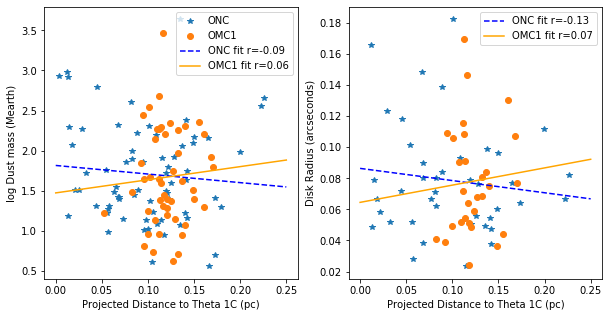

In [20]:
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(10,5))

onc_linreg = linregress(onc_dist, np.log10(onc_dustmass))
omc1_linreg = linregress(omc1_dist, np.log10(omc1_dustmass))

ax0.plot(onc_dist, np.log10(onc_dustmass), label='ONC', linestyle='', marker='*')
ax0.plot(omc1_dist, np.log10(omc1_dustmass), label='OMC1', linestyle='', marker='o')

dvals = np.linspace(0,0.25,10)
onc_fit = dvals* onc_linreg.slope + onc_linreg.intercept
omc1_fit = dvals* omc1_linreg.slope + omc1_linreg.intercept

ax0.plot(dvals, onc_fit, label=f'ONC fit r={np.round(onc_linreg.rvalue, 2)}', color='blue', linestyle='--')
ax0.plot(dvals, omc1_fit, label=f'OMC1 fit r={np.round(omc1_linreg.rvalue, 2)}', color='orange')

ax0.legend()

ax0.set_xlabel('Projected Distance to Theta 1C (pc)')
ax0.set_ylabel('log Dust mass (Mearth)')


onc_linreg = linregress(onc_dist[onc_rdisk_ind], onc_rdisk[onc_rdisk_ind])
omc1_linreg = linregress(omc1_dist[omc1_rdisk_ind], omc1_rdisk[omc1_rdisk_ind])

ax1.plot(onc_dist, onc_rdisk, linestyle='', marker='*')
ax1.plot(omc1_dist, omc1_rdisk, linestyle='', marker='o')

rvals = np.linspace(0,0.25,10)
onc_fit = rvals* onc_linreg.slope + onc_linreg.intercept
omc1_fit = rvals* omc1_linreg.slope + omc1_linreg.intercept

ax1.plot(dvals, onc_fit, label=f'ONC fit r={np.round(onc_linreg.rvalue, 2)}', color='blue', linestyle='--')
ax1.plot(dvals, omc1_fit, label=f'OMC1 fit r={np.round(omc1_linreg.rvalue, 2)}', color='orange')

ax1.legend()

ax1.set_xlabel('Projected Distance to Theta 1C (pc)')
ax1.set_ylabel('Disk Radius (arcseconds)')

plt.savefig('/home/jotter/nrao/plots/dist_theta1c_corrs.png', bbox_inches='tight')